# B.Y.O. Retweet Map

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import plotly.plotly as py
import plotly.tools as tls
import re
from tweepy import API
from tweepy import Cursor
from tweepy import OAuthHandler
from tweepy import RateLimitError
from datetime import datetime
from secrets import *
from functions import *
from constants import *

%matplotlib inline


## Create a Twitter App
First you'll need to sign up for the twitter api, create a new app, then save the access token,  access secret, consumer token, and consumer secret as variables.


## Setting up Tweepy


In [2]:
#setting up authorization
auth = OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the api class instance, using authentication
api = API(auth)
api.wait_on_rate_limit = True
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')


## Setting up Plotly

## Try it out!


In [3]:
screen_name = 'amyklobuchar'

In [4]:
example_df = build_df_from_api(screen_name,n=50)
example_agg = build_aggregation_df(example_df)


KeyboardInterrupt: 

In [23]:
py.iplot(plotly_fig_compiler(example_agg), filename = 'RT Map')


##  Whats Happening






### API Calls


In [29]:
#screen_name = 'Thundercat'
#example_1 = build_df_from_api(screen_name)
#example_1.head()

### API CALLS PART I
First we get the most recent tweets from a given screen name. The get_n_tweets_df() function calls tweepy's api.user_timeline() method on our instance, passing a default argument of n=10. The function excludes retweets from the call, then returns a pandas dataframe of selected fields.

In [2]:
screen_name = 'amyklobuchar'
example_1_a = get_n_tweets_df(screen_name)
example_1_a

,id,text,created_at,favorite_count,retweet_count
0,1097695784773054464,"“On my first day as President, I will sign us ...",2019-02-19 03:14:03,2659,476
1,1097693919599620096,"“We have to govern from opportunity, not the c...",2019-02-19 03:06:39,814,148
2,1097623253554728968,"Stopped by The Village Trestle in Goffstown, N...",2019-02-18 22:25:51,1385,198
3,1097578327316090881,I don’t have a political machine. I don’t come...,2019-02-18 19:27:19,2959,462
4,1097536367960059911,I’ve been saying for a long time that we need ...,2019-02-18 16:40:36,4030,1290
5,1097312132784447491,Stopped for supper at the Monroe County Democr...,2019-02-18 01:49:34,1383,163
6,1097297962265395201,"In the Fargo Forum today by Jack Zaleski, form...",2019-02-18 00:53:15,2339,450
7,1097271308939919360,Loved visiting with the Marion County Democrat...,2019-02-17 23:07:21,1653,228
8,1097208967695093760,"It looks like Abigail, John, and the snowwoman...",2019-02-17 18:59:37,6466,690
9,1096934804203933697,Universal background checks. Sensible gun safe...,2019-02-17 00:50:12,4055,924


## Exploratory Visualization I

In [3]:
example_1_a.dtypes

id                         int64
text                      object
created_at        datetime64[ns]
favorite_count             int64
retweet_count              int64
dtype: object

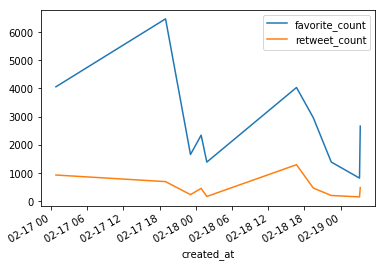

In [4]:
example_1_a.plot(y=['favorite_count','retweet_count'],x='created_at',kind='line')

### API CALLS PART II
Now we take each tweet's id and pass it through tweepy's api.retweeters() method. The API endpoint accessed here, statuses/retweeters/ids, returns "a collection of up to 100 User IDs"--for the scope of this project, we're going to take this limitation as a given. 

In [5]:
example_1_b = get_retweeters_column(example_1_a)
example_1_b.head()

,id,text,created_at,favorite_count,retweet_count,retweeter_ids
0,1097695784773054464,"“On my first day as President, I will sign us ...",2019-02-19 03:14:03,2659,476,"[830622687898660864, 133397127, 26152645, 9952..."
1,1097693919599620096,"“We have to govern from opportunity, not the c...",2019-02-19 03:06:39,814,148,"[911775858045599744, 850253961235800065, 77049..."
2,1097623253554728968,"Stopped by The Village Trestle in Goffstown, N...",2019-02-18 22:25:51,1385,198,"[15522057, 14789146, 356546958, 335161085, 881..."
3,1097578327316090881,I don’t have a political machine. I don’t come...,2019-02-18 19:27:19,2959,462,"[879365309270036480, 406723394, 111156329, 322..."
4,1097536367960059911,I’ve been saying for a long time that we need ...,2019-02-18 16:40:36,4030,1290,"[16909343, 14885194, 406723394, 4660123516, 16..."


In [6]:
print(len(example_1_b.loc[3]['retweeter_ids']))
print(example_1_b.loc[3]['retweet_count'])

94
462


### API CALLS PART III
Now we need to figure out where each of our retweeters is located. While the twitter api does include a 'GEOS' endpoint, it requires users to activate a geo tracking feature, and it seems like very few do.
Fortunately, we can access a 'location' attribute associated with the user model. Unfortunately, this field is user-defined, and the usefulness of the data is--varied. 


In [7]:
example_1_c = get_retweeter_locs_column(example_1_b)
example_1_c.head()

,id,text,created_at,favorite_count,retweet_count,retweeter_ids,retweeter_geos
0,1097695784773054464,"“On my first day as President, I will sign us ...",2019-02-19 03:14:03,2659,476,"[830622687898660864, 133397127, 26152645, 9952...","[illegitimi non carborundum, PhxAZ, Beautiful ..."
1,1097693919599620096,"“We have to govern from opportunity, not the c...",2019-02-19 03:06:39,814,148,"[911775858045599744, 850253961235800065, 77049...","[Minneapolis, Minnesota, USA, Lost in The Old ..."
2,1097623253554728968,"Stopped by The Village Trestle in Goffstown, N...",2019-02-18 22:25:51,1385,198,"[15522057, 14789146, 356546958, 335161085, 881...","[Chicago, IL, Seattle, Greenfields, Perth (WA)..."
3,1097578327316090881,I don’t have a political machine. I don’t come...,2019-02-18 19:27:19,2959,462,"[879365309270036480, 406723394, 111156329, 322...","[The Deep South, Irvine, CA, Pennsylvania, Sea..."
4,1097536367960059911,I’ve been saying for a long time that we need ...,2019-02-18 16:40:36,4030,1290,"[16909343, 14885194, 406723394, 4660123516, 16...","[Portland, OR, minnesota, Irvine, CA, North Ca..."


## PARSING THE LOCATIONS COLUMN
We're all done with api queries, but now we have a VERY messy list of strings we need to make sense of. To accomplish this, we first wrote a dictionary "accepteable_locs" where keys are two letter state codes, and values are generally state names collapsed to a single word. 
Next we wrote a function, get_real_location(), which <br>
--takes a string,<br> 
--filters out words which don't exist in our acceptable locations<br>
--loops over our dictionary of acceptable locations, and adds the key corresponding to the value found and appends it to an output string<br>
--returns a string of the first key in the output string (alphabetically)

In [8]:
get_real_location('hello im from new york')

'NY'

In [11]:
mylist=  ['d']
mylist.append(get_real_location2('hello im from DC'))

In [12]:
mylist

['d', None]

In [13]:
#________FAILS________#
print(get_real_location('ca ny'))
print(get_real_location('ny ca'))
print(get_real_location('im in the middle of nowhere'))
print(get_real_location('why do you want to know me'))
print(get_real_location('la grande oregon'))
print(get_real_location('la california')) #incidentally works because c comes before l
print(get_real_location('washington dc'))

CA
CA
IN
ME
LA
CA
WA


In [18]:
def locs_parser2(lstoflocs):
    """
    applies get_real_location to list of locations
    """
    return list(filter(None,[get_real_location2(name) for name in lstoflocs]))

In [28]:
sample_locs = ['Detroit, Michigan','washington DC', 'Ohio, USA', 'United States of America', 'Levittown, PA', 'Bristol, TN', 'Upper Peninsula, Michigan', 'tinley park', 'Tysons Corner, VA', 'San Diego, CA', 'Midwest,USA', 'louisiana', 'United States', 'The Front Range, Colorado', 'Cedar Grove, CA', 'Halls-Powell-Heiskell', 'Kentucky, USA', 'Los Gatos, CA', 'North Carolina, USA', 'Maine, USA', 'Ohio', 'Michigan', 'Santa Rosa, CA', 'West Virginia, USA', 'Flushing, MI', 'Texas, USA', 'Minneapolis,MN', 'Chicago, IL', 'Rotterdam, NY', 'United States', 'Eagan, MN', 'maggiemahar2@gmail.com', 'Illinois, USA', 'United States', '@kmkrispy', '🇺🇸AMERICA🇺🇸', 'North Carolina, USA', 'United States', 'Ocean County N.J.  Sarasota Fl', 'Minnesota, USA', 'Washington State, USA', '#JC4PM2019', 'Maryland, USA', 'Minneapolis', 'San Antonio, TX', 'Brazil and Massachusetts', 'Cape Cod, MA', 'Texas!', 'Everywhere, USA', 'United States', '#MN02', 'Venice Beach,CA', 'Dirty South', 'New Jersey, USA', 'Maryville, Tennessee', 'United States', 'Milky Way Galaxy, Orion Spur', 'Hagerstown, Indiana', 'New Jersey, USA', 'The HV Bubble', 'NM', 'California, USA', 'North Carolina,  USA', 'NWArkansas', 'Roseville, MN', 'Los Angeles, CA', 'Fayetteville, Arkansas']
print(sample_locs)
print(len(sample_locs))

['Detroit, Michigan', 'washington DC', 'Ohio, USA', 'United States of America', 'Levittown, PA', 'Bristol, TN', 'Upper Peninsula, Michigan', 'tinley park', 'Tysons Corner, VA', 'San Diego, CA', 'Midwest,USA', 'louisiana', 'United States', 'The Front Range, Colorado', 'Cedar Grove, CA', 'Halls-Powell-Heiskell', 'Kentucky, USA', 'Los Gatos, CA', 'North Carolina, USA', 'Maine, USA', 'Ohio', 'Michigan', 'Santa Rosa, CA', 'West Virginia, USA', 'Flushing, MI', 'Texas, USA', 'Minneapolis,MN', 'Chicago, IL', 'Rotterdam, NY', 'United States', 'Eagan, MN', 'maggiemahar2@gmail.com', 'Illinois, USA', 'United States', '@kmkrispy', '🇺🇸AMERICA🇺🇸', 'North Carolina, USA', 'United States', 'Ocean County N.J.  Sarasota Fl', 'Minnesota, USA', 'Washington State, USA', '#JC4PM2019', 'Maryland, USA', 'Minneapolis', 'San Antonio, TX', 'Brazil and Massachusetts', 'Cape Cod, MA', 'Texas!', 'Everywhere, USA', 'United States', '#MN02', 'Venice Beach,CA', 'Dirty South', 'New Jersey, USA', 'Maryville, Tennessee', '

In [29]:
print(locs_parser(sample_locs))
print(len(locs_parser(sample_locs)))
print('----------------')
print(locs_parser2(sample_locs))
print(len(locs_parser2(sample_locs)))
#print(list(zip(locs_parser(sample_locs),locs_parser2(sample_locs))))

['MI', 'WA', 'OH', 'PA', 'TN', 'MI', 'VA', 'CA', 'LA', 'CO', 'CA', 'KY', 'CA', 'NC', 'ME', 'OH', 'MI', 'CA', 'WV', 'MI', 'TX', 'MN', 'IL', 'NY', 'MN', 'IL', 'NC', 'FL', 'MN', 'WA', 'MD', 'TX', 'MA', 'MA', 'CA', 'NJ', 'TN', 'IN', 'NJ', 'NM', 'CA', 'NC', 'MN', 'CA', 'AR']
45
----------------
['MI', 'WA', 'OH', 'PA', 'TN', 'MI', 'VA', 'CA', 'LA', 'CO', 'CA', 'KY', 'CA', 'NC', 'ME', 'OH', 'MI', 'CA', 'WV', 'MI', 'TX', 'MN', 'IL', 'NY', 'MN', 'IL', 'NC', 'FL', 'MN', 'WA', 'MD', 'TX', 'MA', 'MA', 'CA', 'NJ', 'TN', 'IN', 'NJ', 'NM', 'CA', 'NC', 'MN', 'CA', 'AR']
45


In [30]:
sample1= locs_parser(sample_locs)
sample2= locs_parser2(sample_locs)

In [37]:
get_real_location2('washington DC')

'WA'

In [31]:
sample1 ==sample2

True

In [25]:
print(item_counter(sample1))
print(item_counter(sample2))

{'MN': 4, 'CA': 7, 'CO': 1, 'IN': 1, 'TN': 2, 'TX': 2, 'NY': 1, 'PA': 1, 'NJ': 2, 'NC': 3, 'FL': 1, 'MD': 1, 'WA': 1, 'KY': 1, 'WV': 1, 'ME': 1, 'MA': 2, 'LA': 1, 'MI': 4, 'AR': 1, 'VA': 1, 'NM': 1, 'OH': 2, 'IL': 2}
{'MN': 4, 'CA': 7, 'CO': 1, 'IN': 1, 'TN': 2, 'TX': 2, 'NY': 1, 'PA': 1, 'NJ': 2, 'NC': 3, 'FL': 1, 'MD': 1, 'WA': 1, 'KY': 1, 'WV': 1, 'ME': 1, 'MA': 2, 'LA': 1, 'MI': 4, 'AR': 1, 'VA': 1, 'NM': 1, 'OH': 2, 'IL': 2}


In [14]:
get_real_location2('North Carolina')

['northcarolina']


'NC'

In [36]:
def get_real_location2(loc):
    """
    takes messy string of what should be a location
    looks for state name patterns defined in accepteable terms (in constants)
    returns two letter state code associated with state name
    """
    #normalizing input, seperating into list
    clean = loc.replace(',',' ')
    clean_split = clean.split()
    clean_split_lower = state_name_collapser(clean.lower()).split()
   # print(clean_split_lower)

    for each,lst in acceptable_locs.items():
        if each in clean_split and each != 'DC':
            return each
        for item in lst:
                if item in clean_split_lower and item != 'dc':
                    return each

In [8]:
#test_screenname = 'AOC'
#aoc_df = build_df_from_api(test_screenname)
#py.iplot(plotly_compiler(testing2), filename = 'AOC RT Map')



In [21]:
print(fav_rt_histogram(cory_booker,kamala_harris,amy_klobuchar,elizabeth_warren))

NameError: name 'cory_booker' is not defined

In [255]:
py.iplot(plotly_compiler(build_aggregation_df(amy_klobuchar)), filename = 'New RT Map')
    

In [25]:
cory_booker,kamala_harris,elizabeth_warren,amy_klobuchar,donald_trump=dfs.values()


In [34]:
cory_booker.to_pickle("./cory_booker.pkl")


In [35]:
kamala_harris.to_pickle('./kamala_harris.pkl')
elizabeth_warren.to_pickle('./elizabeth_warren.pkl')
amy_klobuchar.to_pickle('./amy_klobuchar.pkl')
donald_trump.to_pickle('./donald_trump.pkl')



In [148]:
aoc_df2.to_pickle('./alexandria_ocasio_cortez')

AttributeError: 'NoneType' object has no attribute 'update'

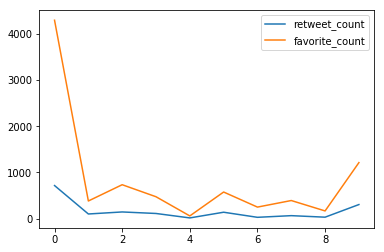

In [60]:
cory_booker.sort_values('created_at').plot(x='created_at',y=['retweet_count','favorite_count'],xticks=cory_booker['created_at'])



,id,text,created_at,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos,parsed_locs,rt_loc_counts
9,1088888135222730752,Finally – looks like President Trump is agreei...,Fri Jan 25 19:55:36 +0000 2019,4291,716,"[1056617114335875072, 24782405, 1274139060, 10...","{'hashtags': [{'text': 'EndTheShutdown', 'indi...","[North Carolina, USA, Toronto, Ontario, LAS VE...","[NC, NV, NJ, TX, NJ, NY, NJ, WA, GA, PA, CA, N...","{'NC': 1, 'NV': 1, 'NJ': 5, 'TX': 2, 'NY': 4, ..."
8,1092473012639723520,"A young man once wrote to Rosa Parks: ""I wonde...",Mon Feb 04 17:20:38 +0000 2019,382,101,"[742080381483094016, 911198269388279808, 11026...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Atlantic Beach, FL, United States, , Philadel...","[FL, CA, TX, NY, OR, LA, CA, TX, WA, CO, LA, N...","{'FL': 3, 'CA': 7, 'TX': 4, 'NY': 2, 'OR': 2, ..."
7,1092539856054636544,Proud that today New Jersey signed a bill to r...,Mon Feb 04 21:46:14 +0000 2019,734,145,"[581613339, 810908522670161924, 82651602924949...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Virginia, USA, , Portland, OR, NEW YORK CITY,...","[VA, OR, NY, MA, CA, CA, FL, AK, CT, TX, MA, C...","{'VA': 2, 'OR': 1, 'NY': 1, 'MA': 3, 'CA': 6, ..."
5,1095046563238477824,Today for #BlackHistoryMonth we recognize Shei...,Mon Feb 11 19:47:00 +0000 2019,474,112,"[1126948525, 3318172933, 21198104, 72758743259...","{'hashtags': [{'text': 'BlackHistoryMonth', 'i...","[Maplewood, NJ, , New Jersey, New Jersey, USA,...","[NJ, NJ, NJ, NJ, NJ, OH, NJ, NJ, PA, NJ, NJ, N...","{'NJ': 27, 'OH': 1, 'PA': 1, 'NY': 1, 'IN': 1,..."
1,1096055556752707589,"Today, we honor Rev. Charles Boyer @RevCharles...",Thu Feb 14 14:36:23 +0000 2019,59,16,"[1071974201601474560, 441932864, 8008225953691...","{'hashtags': [{'text': 'BlackHistoryMonth', 'i...","[Richmond, VA, Edison NJ, Trenton, NJ, Corona,...","[VA, NJ, NJ, CA, TN, NY, CA, AL]","{'VA': 1, 'NJ': 2, 'CA': 2, 'TN': 1, 'NY': 1, ..."
0,1096092854332649472,Lynching is still not a federally designated h...,Thu Feb 14 17:04:35 +0000 2019,576,139,"[1026775528940875776, 3055918575, 55882478, 25...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Washington St, Worcester, , , , Jersey Girl v...","[WA, NJ, NC, KY, NE, IN, TX, VA, NC, NJ, NY, N...","{'WA': 2, 'NJ': 9, 'NC': 2, 'KY': 1, 'NE': 1, ..."
6,1092812200148979713,Happy Lunar New Year to all who celebrate. Wis...,Tue Feb 05 15:48:26 +0000 2019,250,29,"[2247952680, 262948804, 4109632819, 37690992, ...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, NYC, Tualatin/Portland, OR, USA, all over t...","[NY, OR, IN, NJ, MA, KS, CA, CA, NJ, CA, AZ, IN]","{'NY': 1, 'OR': 1, 'IN': 2, 'NJ': 2, 'MA': 1, ..."
4,1095346807398416385,"Today, we honor @PrincipalAkbar, Principal of ...",Tue Feb 12 15:40:04 +0000 2019,392,65,"[911198269388279808, 930964766, 10348368156460...","{'hashtags': [], 'symbols': [], 'user_mentions...","[United States, CALIFORNIA (CA VOTED 4 HILLARY...","[CA, CA, GA, CA, TX, NJ, VT, NJ, IL, AL, NJ, T...","{'CA': 4, 'GA': 1, 'TX': 2, 'NJ': 8, 'VT': 1, ..."
3,1095788647654273041,"When I think of how bright our future is, I th...",Wed Feb 13 20:55:47 +0000 2019,167,32,"[179763522, 26916193, 32167206, 41831995, 3277...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, ATL, GA, United States, Florida, New Jersey...","[GA, FL, NJ, TX, NY, NY, NY, NJ, NH, NJ, IL, N...","{'GA': 1, 'FL': 1, 'NJ': 6, 'TX': 1, 'NY': 3, ..."
2,1095818954734473216,"In this moment in history, during this crisis ...",Wed Feb 13 22:56:12 +0000 2019,1212,305,"[918195949356404736, 22846618, 996412303275937...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, arizona, Texas, Maine, , , East Orange, NJ,...","[AZ, TX, ME, NJ, NJ, SC, WA, NY, AL, CA, FL, C...","{'AZ': 1, 'TX': 3, 'ME': 1, 'NJ': 4, 'SC': 2, ..."


In [74]:
# long_df = pd.DataFrame()
# for each in dfs.values():
#     print(each)
#     long_df.append(each)
    


,id,text,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos,parsed_locs,rt_loc_counts
created_at,,,,,,,,,
Thu Feb 14 17:04:35 +0000 2019,1096092854332649472,Lynching is still not a federally designated h...,576,139,"[1026775528940875776, 3055918575, 55882478, 25...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Washington St, Worcester, , , , Jersey Girl v...","[WA, NJ, NC, KY, NE, IN, TX, VA, NC, NJ, NY, N...","{'WA': 2, 'NJ': 9, 'NC': 2, 'KY': 1, 'NE': 1, ..."
Thu Feb 14 14:36:23 +0000 2019,1096055556752707589,"Today, we honor Rev. Charles Boyer @RevCharles...",59,16,"[1071974201601474560, 441932864, 8008225953691...","{'hashtags': [{'text': 'BlackHistoryMonth', 'i...","[Richmond, VA, Edison NJ, Trenton, NJ, Corona,...","[VA, NJ, NJ, CA, TN, NY, CA, AL]","{'VA': 1, 'NJ': 2, 'CA': 2, 'TN': 1, 'NY': 1, ..."
Wed Feb 13 22:56:12 +0000 2019,1095818954734473216,"In this moment in history, during this crisis ...",1212,305,"[918195949356404736, 22846618, 996412303275937...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, arizona, Texas, Maine, , , East Orange, NJ,...","[AZ, TX, ME, NJ, NJ, SC, WA, NY, AL, CA, FL, C...","{'AZ': 1, 'TX': 3, 'ME': 1, 'NJ': 4, 'SC': 2, ..."
Wed Feb 13 20:55:47 +0000 2019,1095788647654273041,"When I think of how bright our future is, I th...",167,32,"[179763522, 26916193, 32167206, 41831995, 3277...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, ATL, GA, United States, Florida, New Jersey...","[GA, FL, NJ, TX, NY, NY, NY, NJ, NH, NJ, IL, N...","{'GA': 1, 'FL': 1, 'NJ': 6, 'TX': 1, 'NY': 3, ..."
Tue Feb 12 15:40:04 +0000 2019,1095346807398416385,"Today, we honor @PrincipalAkbar, Principal of ...",392,65,"[911198269388279808, 930964766, 10348368156460...","{'hashtags': [], 'symbols': [], 'user_mentions...","[United States, CALIFORNIA (CA VOTED 4 HILLARY...","[CA, CA, GA, CA, TX, NJ, VT, NJ, IL, AL, NJ, T...","{'CA': 4, 'GA': 1, 'TX': 2, 'NJ': 8, 'VT': 1, ..."
Mon Feb 11 19:47:00 +0000 2019,1095046563238477824,Today for #BlackHistoryMonth we recognize Shei...,474,112,"[1126948525, 3318172933, 21198104, 72758743259...","{'hashtags': [{'text': 'BlackHistoryMonth', 'i...","[Maplewood, NJ, , New Jersey, New Jersey, USA,...","[NJ, NJ, NJ, NJ, NJ, OH, NJ, NJ, PA, NJ, NJ, N...","{'NJ': 27, 'OH': 1, 'PA': 1, 'NY': 1, 'IN': 1,..."
Tue Feb 05 15:48:26 +0000 2019,1092812200148979713,Happy Lunar New Year to all who celebrate. Wis...,250,29,"[2247952680, 262948804, 4109632819, 37690992, ...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, NYC, Tualatin/Portland, OR, USA, all over t...","[NY, OR, IN, NJ, MA, KS, CA, CA, NJ, CA, AZ, IN]","{'NY': 1, 'OR': 1, 'IN': 2, 'NJ': 2, 'MA': 1, ..."
Mon Feb 04 21:46:14 +0000 2019,1092539856054636544,Proud that today New Jersey signed a bill to r...,734,145,"[581613339, 810908522670161924, 82651602924949...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Virginia, USA, , Portland, OR, NEW YORK CITY,...","[VA, OR, NY, MA, CA, CA, FL, AK, CT, TX, MA, C...","{'VA': 2, 'OR': 1, 'NY': 1, 'MA': 3, 'CA': 6, ..."
Mon Feb 04 17:20:38 +0000 2019,1092473012639723520,"A young man once wrote to Rosa Parks: ""I wonde...",382,101,"[742080381483094016, 911198269388279808, 11026...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Atlantic Beach, FL, United States, , Philadel...","[FL, CA, TX, NY, OR, LA, CA, TX, WA, CO, LA, N...","{'FL': 3, 'CA': 7, 'TX': 4, 'NY': 2, 'OR': 2, ..."


In [78]:
cory_booker['name'] = 'Cory Booker'
elizabeth_warren['name'] = 'Elizabeth Warren'
amy_klobuchar['name'] = 'Amy Klobuchar'
kamala_harris['name'] = 'Kamala Harris'


In [80]:
cory_booker.append([kamala_harris,elizabeth_warren,amy_klobuchar]).set_index('created_at').sort_index()

,id,text,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos,parsed_locs,rt_loc_counts,name
created_at,,,,,,,,,,
Fri Feb 08 23:01:44 +0000 2019,1094008404933308417,A bank teller who takes a few 20s from the ban...,42484,12364,"[22573115, 395032876, 1548668976, 1351920236, ...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Los Angeles, AroundtheWorld, Kansas City, MO,...","[KS, TX, KY, TN, WA, CO, WA, CA, WA, MS, TX, T...","{'KS': 1, 'TX': 4, 'KY': 1, 'TN': 1, 'WA': 4, ...",Elizabeth Warren
Fri Jan 25 19:55:36 +0000 2019,1088888135222730752,Finally – looks like President Trump is agreei...,4291,716,"[1056617114335875072, 24782405, 1274139060, 10...","{'hashtags': [{'text': 'EndTheShutdown', 'indi...","[North Carolina, USA, Toronto, Ontario, LAS VE...","[NC, NV, NJ, TX, NJ, NY, NJ, WA, GA, PA, CA, N...","{'NC': 1, 'NV': 1, 'NJ': 5, 'TX': 2, 'NY': 4, ...",Cory Booker
Mon Feb 04 17:20:38 +0000 2019,1092473012639723520,"A young man once wrote to Rosa Parks: ""I wonde...",382,101,"[742080381483094016, 911198269388279808, 11026...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Atlantic Beach, FL, United States, , Philadel...","[FL, CA, TX, NY, OR, LA, CA, TX, WA, CO, LA, N...","{'FL': 3, 'CA': 7, 'TX': 4, 'NY': 2, 'OR': 2, ...",Cory Booker
Mon Feb 04 21:46:14 +0000 2019,1092539856054636544,Proud that today New Jersey signed a bill to r...,734,145,"[581613339, 810908522670161924, 82651602924949...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Virginia, USA, , Portland, OR, NEW YORK CITY,...","[VA, OR, NY, MA, CA, CA, FL, AK, CT, TX, MA, C...","{'VA': 2, 'OR': 1, 'NY': 1, 'MA': 3, 'CA': 6, ...",Cory Booker
Mon Feb 11 19:04:47 +0000 2019,1095035939330637824,It’s too easy for the wealthy &amp; well-conne...,5625,1668,"[558293436, 1093808701427851265, 1093797278081...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Encourage Others to Vote, Topeka, KS, Modesto...","[KS, CA, LA, MN, IN, FL, CO, OR, UT, CA, FL, K...","{'KS': 2, 'CA': 6, 'LA': 1, 'MN': 2, 'IN': 1, ...",Elizabeth Warren
Mon Feb 11 19:47:00 +0000 2019,1095046563238477824,Today for #BlackHistoryMonth we recognize Shei...,474,112,"[1126948525, 3318172933, 21198104, 72758743259...","{'hashtags': [{'text': 'BlackHistoryMonth', 'i...","[Maplewood, NJ, , New Jersey, New Jersey, USA,...","[NJ, NJ, NJ, NJ, NJ, OH, NJ, NJ, PA, NJ, NJ, N...","{'NJ': 27, 'OH': 1, 'PA': 1, 'NY': 1, 'IN': 1,...",Cory Booker
Mon Feb 11 23:05:10 +0000 2019,1095096435652083712,Mary Hamilton successfully fought a court syst...,3810,1001,"[1088183846829355008, 822793198632214530, 9800...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Las Vegas, NV, Mississippi, USA, , , Shoreacr...","[NV, MS, TX, TX, CO, OK, IL, LA, MA, NY, WA, C...","{'NV': 1, 'MS': 1, 'TX': 2, 'CO': 2, 'OK': 2, ...",Elizabeth Warren
Thu Feb 14 00:18:02 +0000 2019,1095839546741350400,After @lucymcbath’s son Jordan was shot and ki...,2970,682,"[2575899541, 4210094173, 876558081026600963, 1...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, , 🌎of Mystery, , , Phoenix, AZ, Minnesota/F...","[AZ, KY, CA, NJ, IL, PA, TX, GA, IN, WI, AR, T...","{'AZ': 3, 'KY': 1, 'CA': 4, 'NJ': 1, 'IL': 1, ...",Kamala Harris
Thu Feb 14 01:02:11 +0000 2019,1095850656487915520,"I promise you this: As your President, I will ...",6957,1033,"[934978821429891072, 751420631791439872, 86343...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, Washington, USA, , Silicon Valley, Californ...","[WA, CA, IN, NY, VA, PA, NY, CA, OH, AL, AK, N...","{'WA': 3, 'CA': 7, 'IN': 2, 'NY': 3, 'VA': 2, ...",Amy Klobuchar


In [82]:
dates = pd.date_range(start = '2019-01-25',end='2019-02-14',freq='D')

In [85]:
dates

DatetimeIndex(['2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14'],
              dtype='datetime64[ns]', freq='D')

In [95]:
cory_booker['created_at'].astype(datetime)

In [116]:
sample_datetime_series = pd.to_datetime(cory_booker['created_at'], '%m/%d/%Y')

In [134]:
sample_2 = sample_datetime_series.apply(lambda x: x.strftime('%m/%d/%Y'))


In [139]:
pd.to_datetime(sample_2)

0   2019-02-14
1   2019-02-14
2   2019-02-13
3   2019-02-13
4   2019-02-12
5   2019-02-11
6   2019-02-05
7   2019-02-04
8   2019-02-04
9   2019-01-25
Name: created_at, dtype: datetime64[ns]